# Imports

In [159]:
import json
import random
import networkx as nx
from matplotlib import pyplot as plt
from networkx.readwrite import json_graph

COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400
EDGE_BG_WEIGHT = 4
EDGE_FG_WEIGHT = 24
MATRIX_SIDE = 10
NO_FG_NODES = 20
FIG_SIZE = (12, 12)

# Activity 2

## 2.1 Sub-activity: Graph creation

### Task 1

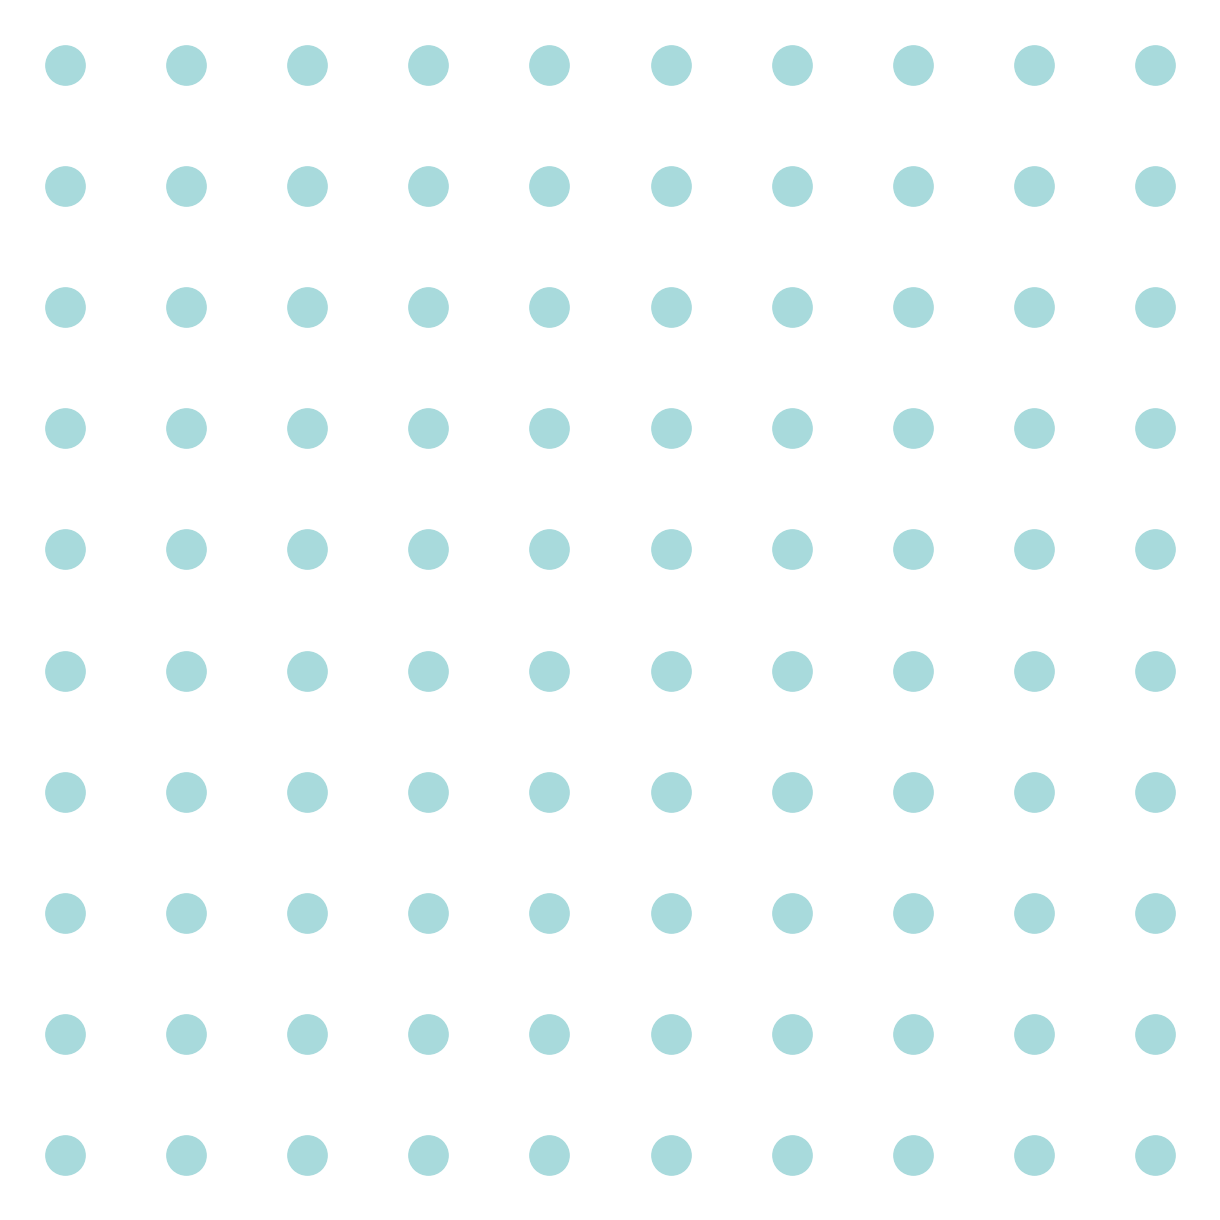

In [160]:
# Create a 2D grid graph
G = nx.grid_2d_graph(MATRIX_SIDE, MATRIX_SIDE)

# Get the positions of the nodes
pos = {(x,y):(y,-x) for x in range(MATRIX_SIDE) for y in range(MATRIX_SIDE)}

# Remove the edges between the nodes
G.remove_edges_from(G.edges())

# Set the figure size
plt.figure(figsize = FIG_SIZE)

# Draw the grid graph
nx.draw(G, pos=pos, node_color = COLOR_BG, node_size = SIZE_BG_NODES)

### Task 2

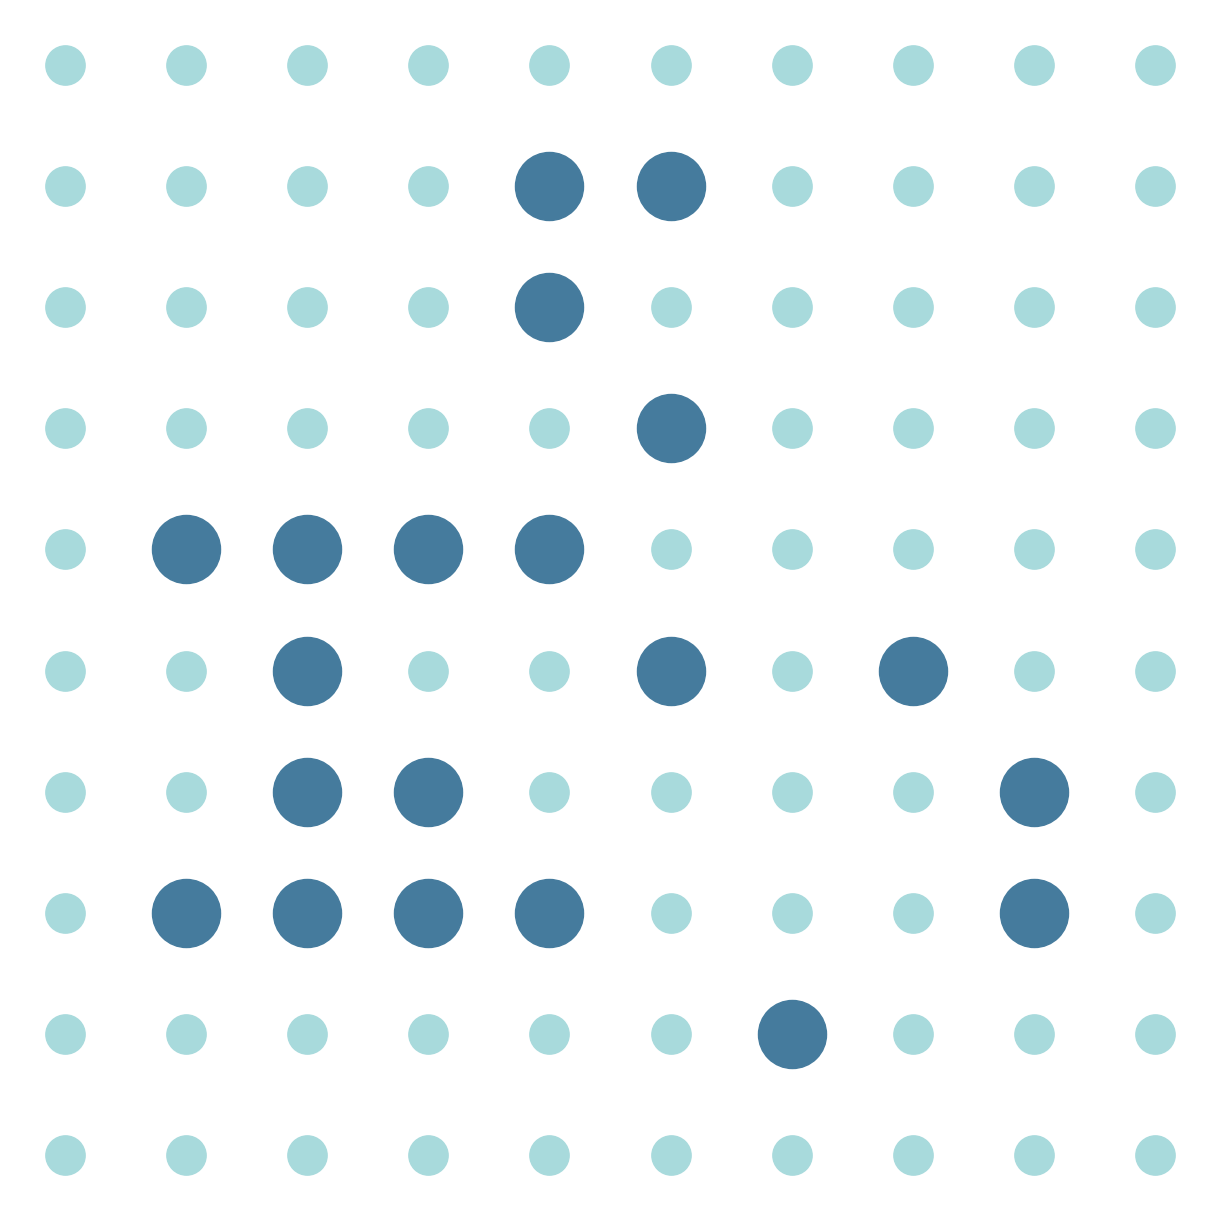

In [161]:

# Get the possible positions of the foreground nodes
possible_positions = {(x,y):(y,-x) for x in range(1, MATRIX_SIDE-1) for y in range(1, MATRIX_SIDE-1)}

# Choose the positions ramdomly by positions' keys
chosen_positions_keys = random.sample(list(possible_positions.keys()), NO_FG_NODES)

# Get the chosen positions
chosen_positions = {key:possible_positions[key] for key in chosen_positions_keys}

# Draw the foreground nodes
plt.figure(figsize = FIG_SIZE)
nx.draw(G, pos=pos, node_color = COLOR_BG, node_size = SIZE_BG_NODES)
nx.draw(G, pos=pos, nodelist=chosen_positions, node_color = COLOR_FG, node_size = SIZE_FG_NODES)

### Task 3

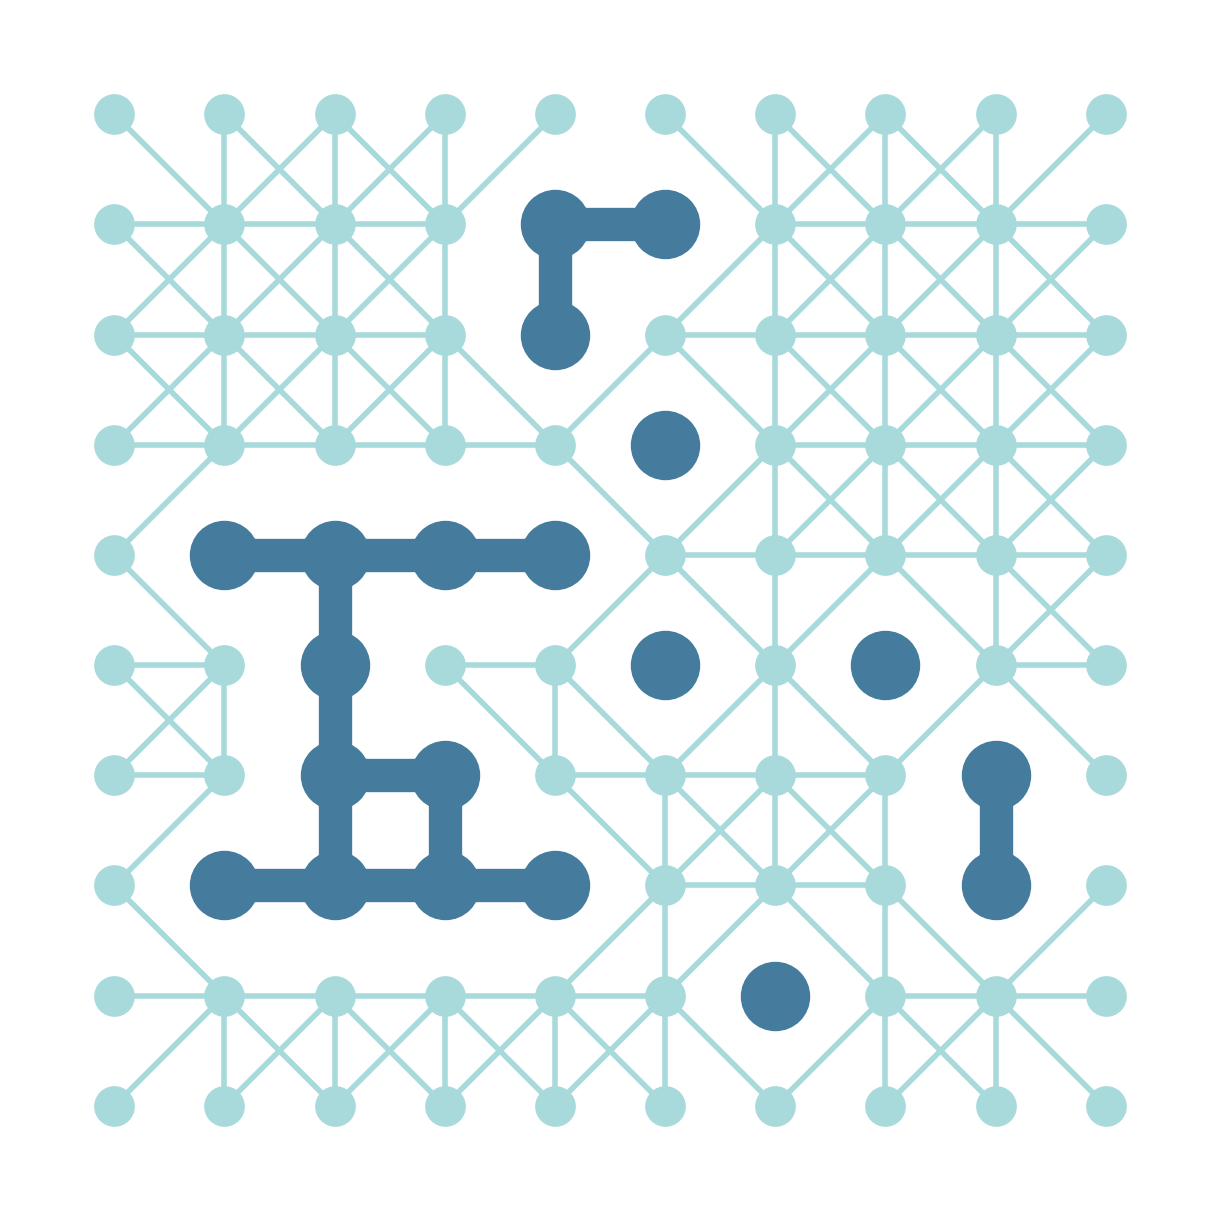

In [162]:
for x in range(MATRIX_SIDE):
    for y in range(MATRIX_SIDE):
        if (x,y) in chosen_positions:
            for i in list([-1, 0, 1]):
                for j in list([-1, 0, 1]):
                    if (x+i,y+j) in chosen_positions:
                        if i == 0 and j == 1:
                            G.add_edge((x, y), (x+i,y+j), weight = EDGE_FG_WEIGHT, color = COLOR_FG, width = EDGE_FG_WEIGHT)
                        elif i == 0 and j == -1:
                            G.add_edge((x, y), (x+i,y+j), weight = EDGE_FG_WEIGHT, color = COLOR_FG, width = EDGE_FG_WEIGHT)
                        elif i == 1 and j == 0:
                            G.add_edge((x, y), (x+i,y+j), weight = EDGE_FG_WEIGHT, color = COLOR_FG, width = EDGE_FG_WEIGHT)
                        elif i == -1 and j == 0:
                            G.add_edge((x, y), (x+i,y+j), weight = EDGE_FG_WEIGHT, color = COLOR_FG, width = EDGE_FG_WEIGHT)

FG_edges = [edge for edge in G.edges()]
G.remove_edges_from(G.edges())

plt.figure(figsize = FIG_SIZE)
nx.draw(G, pos=pos, node_color = COLOR_BG, node_size = SIZE_BG_NODES)
nx.draw(G, pos=pos, nodelist=chosen_positions, node_color = COLOR_FG, node_size = SIZE_FG_NODES)
nx.draw_networkx_edges(G, pos=pos, edgelist=FG_edges, edge_color = COLOR_FG, width = EDGE_FG_WEIGHT)

for x in range(1, MATRIX_SIDE-1):
    for y in range(1, MATRIX_SIDE-1):
        if (x,y) not in chosen_positions:
            if (x+0,y+1) not in chosen_positions:
                G.add_edge((x, y), (x+0,y+1), weight = EDGE_BG_WEIGHT, color = COLOR_BG, width = EDGE_BG_WEIGHT)
            if (x+0,y-1) not in chosen_positions:
                G.add_edge((x, y), (x+0,y-1), weight = EDGE_BG_WEIGHT, color = COLOR_BG, width = EDGE_BG_WEIGHT)
            if (x+1,y+1) not in chosen_positions:
                G.add_edge((x, y), (x+1,y+1), weight = EDGE_BG_WEIGHT, color = COLOR_BG, width = EDGE_BG_WEIGHT)
            if (x+1,y-1) not in chosen_positions:
                G.add_edge((x, y), (x+1,y-1), weight = EDGE_BG_WEIGHT, color = COLOR_BG, width = EDGE_BG_WEIGHT)
            if (x-1,y+1) not in chosen_positions:
                G.add_edge((x, y), (x-1,y+1), weight = EDGE_BG_WEIGHT, color = COLOR_BG, width = EDGE_BG_WEIGHT)
            if (x-1,y-1) not in chosen_positions:
                G.add_edge((x, y), (x-1,y-1), weight = EDGE_BG_WEIGHT, color = COLOR_BG, width = EDGE_BG_WEIGHT)
            if (x+1,y+0) not in chosen_positions:
                G.add_edge((x, y), (x+1,y+0), weight = EDGE_BG_WEIGHT, color = COLOR_BG, width = EDGE_BG_WEIGHT)
            if (x-1,y+0) not in chosen_positions:
                G.add_edge((x, y), (x-1,y+0), weight = EDGE_BG_WEIGHT, color = COLOR_BG, width = EDGE_BG_WEIGHT)

BG_edges = [edge for edge in G.edges()]
nx.draw_networkx_edges(G, pos=pos, edgelist=BG_edges, edge_color = COLOR_BG, width = EDGE_BG_WEIGHT)

G.add_edges_from(FG_edges, weight = EDGE_BG_WEIGHT)

## 2.2 Sub-activity: Graph manipulation and output

### Task 4

In [163]:
print("The infomation about the graph:", nx.info(G), "\n")
print("The density of the graph is:", nx.density(G), "\n")
print("The degree centrality of the graph is:", nx.degree_centrality(G))

The infomation about the graph: Graph with 100 nodes and 182 edges 

The density of the graph is: 0.03676767676767677 

The degree centrality of the graph is: {(0, 0): 0.010101010101010102, (0, 1): 0.020202020202020204, (0, 2): 0.030303030303030304, (0, 3): 0.020202020202020204, (0, 4): 0.010101010101010102, (0, 5): 0.010101010101010102, (0, 6): 0.020202020202020204, (0, 7): 0.030303030303030304, (0, 8): 0.020202020202020204, (0, 9): 0.010101010101010102, (1, 0): 0.020202020202020204, (1, 1): 0.08080808080808081, (1, 2): 0.08080808080808081, (1, 3): 0.06060606060606061, (1, 4): 0.020202020202020204, (1, 5): 0.010101010101010102, (1, 6): 0.07070707070707072, (1, 7): 0.08080808080808081, (1, 8): 0.08080808080808081, (1, 9): 0.020202020202020204, (2, 0): 0.030303030303030304, (2, 1): 0.08080808080808081, (2, 2): 0.08080808080808081, (2, 3): 0.06060606060606061, (2, 4): 0.010101010101010102, (2, 5): 0.04040404040404041, (2, 6): 0.06060606060606061, (2, 7): 0.08080808080808081, (2, 8): 0.08

/var/folders/dn/rwz32gqj5951m0mt9y7smnn80000gn/T/ipykernel_81678/1329196494.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print("The infomation about the graph:", nx.info(G), "\n")


### Task 5

In [164]:
# Save the graph as a JSON file named "graph.json" to the current directory
with open ("graph.json", "w") as f:
    json.dump(json_graph.node_link_data(G), f, indent = 4)